# Filtering data, slicing and dicing
&nbsp;
## Content:
1. Filtering columns and rows by string = df[['column name 1', 'column name 2']]
</div>

2. Filtering row by row index = df[start:stop] or df.iloc[start:stop]
</div>

3. Slicing using .loc[row index range, column index range] and .iloc[row index range, column index range]
</div>

-df.iloc. eg:df.iloc[1:3, 5] returns rows 1 and 2 in column 5
</div>

-df.loc. eg:df.loc[3:7, 'Sheep':'Barley'] returns 3 to 7(incl.) and in columns Sheep to Barley (incl.)

4. By values
</div>

-.isin. eg= count[ ( count['Oats'] < 500) & (count['Barley']>100) & (count['Drainage'].isin(['OK']) ) ] # longer
-.query.eg=count.query('Oats < 500 & Barley > 100 & Drainage=="OK"') # shorter
</div>

5. Subsetting using df.groupby('column name').mean/count/sum/size() 

IMPORTANT:
</div>

-columns starts from 0 exclude index, row starts from 0 exclude header
</div>

-latter number excluded EXCEPT FOR .loc()


In [2]:
import pandas as pd

In [3]:
count=pd.read_csv('../Datasets/count.csv')
count

,Field,Sheep,Goats,Barley,Oats
0,Waun_fach,45,44,103,521
1,Ffos_fawr,5,2,233,324
2,Aberheidol,67,23,432,734
3,Hen_cae,8,6,612,123
4,Glynan,23,7,332,243
5,Derwen,4,9,12,734
6,Llanwenant,55,3,4,128
7,Heol-y-bryn,1,11,543,223
8,Lan-y-mor,2,34,723,316
9,Pen-y-garn,67,3,126,402


### 1.1 Filtering columns by string

To select various columns from our dataframe, we use the syntax `dataframe[['column name 1', 'column name 2']]`.

In [13]:
count[['Barley']]

,Barley
0,103
1,233
2,432
3,612
4,332
5,12
6,4
7,543
8,723
9,126


In [10]:
count[['Sheep', 'Goats']]

,Sheep,Goats
0,45,44
1,5,2
2,67,23
3,8,6
4,23,7
5,4,9
6,55,3
7,1,11
8,2,34
9,67,3


### 1.2 Filtering rows

To select rows based on index value, use the syntax `dataframe[start:stop]`. The 'stop' index is **not** included. Therefore, the 'stop' index is 1 more than we actually need. For example, to select rows 1 to 4,  use the code...

In [14]:
count[1:5]

,Field,Sheep,Goats,Barley,Oats
1,Ffos_fawr,5,2,233,324
2,Aberheidol,67,23,432,734
3,Hen_cae,8,6,612,123
4,Glynan,23,7,332,243


And to select the first 7 rows i.e. rows 0-6, we would use the code...

In [18]:
count[:7] #alternative=[0:7]

,Field,Sheep,Goats,Barley,Oats
0,Waun_fach,45,44,103,521
1,Ffos_fawr,5,2,233,324
2,Aberheidol,67,23,432,734
3,Hen_cae,8,6,612,123
4,Glynan,23,7,332,243
5,Derwen,4,9,12,734
6,Llanwenant,55,3,4,128


Select the last row using `count[-1:]`. Write code in the cell below to select the last 3 rows.

In [20]:
count[-3:]

,Field,Sheep,Goats,Barley,Oats
7,Heol-y-bryn,1,11,543,223
8,Lan-y-mor,2,34,723,316
9,Pen-y-garn,67,3,126,402


Now select all the rows except the last one.

### 3. Slicing

- `.iloc[]` is indexed-based, have to pass the **integer location** of the row or column we want to slice.
- `.loc[]` is label-based,have to pass the **label** of the row or column we want to slice.

### Integer location with `.iloc`

`.iloc[]` uses the syntax `df.iloc[row index range, column index range]`.  For example:

- `df.iloc[2:4]` returns rows 2 and 3
- `df.iloc[:5]` returns rows 0, 1, 2, 3 and 4
- `df.iloc[:, 1]` returns column 1
- `df.iloc[1:3, 5]` returns rows 1 and 2 in column 5
- `df.iloc[:2, :3]` returns the values in rows 0 and 1, columns 0, 1 and 2
- `df.iloc[2,5]` returns the value in row 2, column 5

In [4]:
count.iloc[1:3]

,Field,Sheep,Goats,Barley,Oats
1,Ffos_fawr,5,2,233,324
2,Aberheidol,67,23,432,734


In [7]:
count.iloc[:, 2:3]

,Goats
0,44
1,2
2,23
3,6
4,7
5,9
6,3
7,11
8,34
9,3


In [8]:
count.iloc[5:9, 4]

5    734
6    128
7    223
8    316
Name: Oats, dtype: int64

In [11]:
count.iloc[2:4, :3]

,Field,Sheep,Goats
2,Aberheidol,67,23
3,Hen_cae,8,6


In [ ]:
count.iloc[3:8, -1]

In [10]:
print(count)
count.iloc[8,1]

         Field  Sheep  Goats  Barley  Oats
0    Waun_fach     45     44     103   521
1    Ffos_fawr      5      2     233   324
2   Aberheidol     67     23     432   734
3      Hen_cae      8      6     612   123
4       Glynan     23      7     332   243
5       Derwen      4      9      12   734
6   Llanwenant     55      3       4   128
7  Heol-y-bryn      1     11     543   223
8    Lan-y-mor      2     34     723   316
9   Pen-y-garn     67      3     126   402


2

### labels for location with `.loc`

We use `.loc[]` when we want to refer to columns (or rows) by their names, rather than their index. `.loc[]` uses the same syntax as `.iloc[]` but there is one important difference - both the `start` **and** the `stop` are **inclusive**. 

Let's run through some examples...

In [17]:
count.loc[2:4,['Sheep']]

,Sheep
2,67
3,8
4,23


In [18]:
count.loc[3:7, 'Sheep':'Barley']

,Sheep,Goats,Barley
3,8,6,612
4,23,7,332
5,4,9,12
6,55,3,4
7,1,11,543


### 4. By values

4.1 Subsetting by numerical value

In [19]:
count[count['Sheep'] > 10]

,Field,Sheep,Goats,Barley,Oats
0,Waun_fach,45,44,103,521
2,Aberheidol,67,23,432,734
4,Glynan,23,7,332,243
6,Llanwenant,55,3,4,128
9,Pen-y-garn,67,3,126,402


In [20]:
count[(count['Sheep'] > 10) & (count['Goats'] < 20)]

,Field,Sheep,Goats,Barley,Oats
4,Glynan,23,7,332,243
6,Llanwenant,55,3,4,128
9,Pen-y-garn,67,3,126,402


In [21]:
count[count['Barley'] > count['Oats']]

,Field,Sheep,Goats,Barley,Oats
3,Hen_cae,8,6,612,123
4,Glynan,23,7,332,243
7,Heol-y-bryn,1,11,543,223
8,Lan-y-mor,2,34,723,316


### Logical operators are used to compare values

<div class="alert alert-block alert-info">
Some of the logical operators you might find useful are:
<ul>
<li>equals: ==</li>  
<li>does not equal: !=</li>
<li>is greater than: ></li>
<li>is less than: <</li>
<li>is greater than or equal to: >=</li>
<li>is less than or equal to: <=</li>
</ul>
</div>

These logical operators all return `True` or `False` values.

In [22]:
1 == 1

True

In [23]:
1 > 2

False

In [24]:
print(count)

         Field  Sheep  Goats  Barley  Oats
0    Waun_fach     45     44     103   521
1    Ffos_fawr      5      2     233   324
2   Aberheidol     67     23     432   734
3      Hen_cae      8      6     612   123
4       Glynan     23      7     332   243
5       Derwen      4      9      12   734
6   Llanwenant     55      3       4   128
7  Heol-y-bryn      1     11     543   223
8    Lan-y-mor      2     34     723   316
9   Pen-y-garn     67      3     126   402


In [25]:
count['Sheep'] > 10

0     True
1    False
2     True
3    False
4     True
5    False
6     True
7    False
8    False
9     True
Name: Sheep, dtype: bool

In [26]:
count['Barley'] > count['Oats'] 

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7     True
8     True
9    False
dtype: bool

4.2 Filter dataframes to extract rows that contain values within a specified list using the `isin` command.

In [27]:
count["Soil"] = ["Sand","Loam","Loam","Clay","Clay","Loam","Sand","Sand","Clay","Clay"]
count["Drainage"] = ["Good", "OK", "Poor", "Poor", "Poor", "Good", "Good", "OK", "OK","Poor"]

In [28]:
count[count['Soil'].isin(['Clay','Loam'])]

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
1,Ffos_fawr,5,2,233,324,Loam,OK
2,Aberheidol,67,23,432,734,Loam,Poor
3,Hen_cae,8,6,612,123,Clay,Poor
4,Glynan,23,7,332,243,Clay,Poor
5,Derwen,4,9,12,734,Loam,Good
8,Lan-y-mor,2,34,723,316,Clay,OK
9,Pen-y-garn,67,3,126,402,Clay,Poor


In [30]:
count[count['Drainage'].isin(['OK'])]

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
1,Ffos_fawr,5,2,233,324,Loam,OK
7,Heol-y-bryn,1,11,543,223,Sand,OK
8,Lan-y-mor,2,34,723,316,Clay,OK


In [40]:
count[count['Soil'].isin(['Sand', 'Clay']) & count['Oats'] < 400]

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
0,Waun_fach,45,44,103,521,Sand,Good
1,Ffos_fawr,5,2,233,324,Loam,OK
2,Aberheidol,67,23,432,734,Loam,Poor
3,Hen_cae,8,6,612,123,Clay,Poor
4,Glynan,23,7,332,243,Clay,Poor
5,Derwen,4,9,12,734,Loam,Good
6,Llanwenant,55,3,4,128,Sand,Good
7,Heol-y-bryn,1,11,543,223,Sand,OK
8,Lan-y-mor,2,34,723,316,Clay,OK
9,Pen-y-garn,67,3,126,402,Clay,Poor


4.3 Subsetting a dataframe based on criteria using the `query` function.

In [42]:
count.query('Field == "Lan-y-mor"')

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
8,Lan-y-mor,2,34,723,316,Clay,OK


This `query` function gives the same result as some of the logical operators we used earlier:

In [41]:
count[count['Field'] == "Lan-y-mor"]

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
8,Lan-y-mor,2,34,723,316,Clay,OK


For more complex criteria, the `query` function allows us to write shorter and more readable code.

Here's another example, that doesn't require repeating `count[...]` 3 times.

In [43]:
count.query('Sheep > 10 & Barley < 500')

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
0,Waun_fach,45,44,103,521,Sand,Good
2,Aberheidol,67,23,432,734,Loam,Poor
4,Glynan,23,7,332,243,Clay,Poor
6,Llanwenant,55,3,4,128,Sand,Good
9,Pen-y-garn,67,3,126,402,Clay,Poor


In [46]:
count[(count['Sheep']> 10) & (count['Barley'] < 500)]

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
0,Waun_fach,45,44,103,521,Sand,Good
2,Aberheidol,67,23,432,734,Loam,Poor
4,Glynan,23,7,332,243,Clay,Poor
6,Llanwenant,55,3,4,128,Sand,Good
9,Pen-y-garn,67,3,126,402,Clay,Poor


Use the `query` function to extract the rows that have more than 100 barley, less than 500 oats, and OK drainage.

In [56]:
count.query('Oats < 500 & Barley > 100 & Drainage=="OK"')

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
1,Ffos_fawr,5,2,233,324,Loam,OK
7,Heol-y-bryn,1,11,543,223,Sand,OK
8,Lan-y-mor,2,34,723,316,Clay,OK


In [65]:
count[(count['Drainage'].isin(['OK'])) & (count['Oats'] < 500) & (count['Barley']>100)]

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
1,Ffos_fawr,5,2,233,324,Loam,OK
7,Heol-y-bryn,1,11,543,223,Sand,OK
8,Lan-y-mor,2,34,723,316,Clay,OK


### Subsetting using `groupby`

`groupby` is another really useful function in Python. It allows us to split a dataframe into groups and then perform a function on each of those groups. For example...

- `count.groupby('Soil').mean(numeric_only = True)`
- `count.groupby('Drainage').max(numeric_only = True)`

In [33]:
count

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
0,Waun_fach,45,44,103,521,Sand,Good
1,Ffos_fawr,5,2,233,324,Loam,OK
2,Aberheidol,67,23,432,734,Loam,Poor
3,Hen_cae,8,6,612,123,Clay,Poor
4,Glynan,23,7,332,243,Clay,Poor
5,Derwen,4,9,12,734,Loam,Good
6,Llanwenant,55,3,4,128,Sand,Good
7,Heol-y-bryn,1,11,543,223,Sand,OK
8,Lan-y-mor,2,34,723,316,Clay,OK
9,Pen-y-garn,67,3,126,402,Clay,Poor


In [31]:
count.groupby('Soil').mean(numeric_only = True)

,Sheep,Goats,Barley,Oats
Soil,,,,
Clay,25.000000,12.500000,448.250000,271.000000
Loam,25.333333,11.333333,225.666667,597.333333
Sand,33.666667,19.333333,216.666667,290.666667


In [32]:
count.groupby('Drainage').max(numeric_only = True)

,Sheep,Goats,Barley,Oats
Drainage,,,,
Good,55,44,103,734
OK,5,34,723,324
Poor,67,23,612,734


# Filtering data, slicing and dicing

&nbsp;  

<div class="alert alert-block alert-info">
<b>Remember:</b> Python indexing starts at 0. This means that the first element in an object is located at position 0.   
</div>

&nbsp;  
<div>
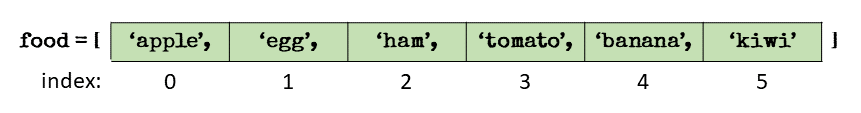
</div>

&nbsp;
## Content:
1. Filtering columns and rows by string = df[['column name 1', 'column name 2']]
</div>

2. Filtering row by row index = df[start:stop] or df.iloc[start:stop]
</div>

3. Slicing using .loc[row index range, column index range] and .iloc[row index range, column index range]
</div>

- df.iloc. eg:df.iloc[1:3, 5] returns rows 1 and 2 in column 5
</div>

- df.loc. eg:df.loc[3:7, 'Sheep':'Barley'] returns 3 to 7(incl.) and in columns Sheep to Barley (incl.)

4. By values
</div>

- .isin. eg= count[ ( count['Oats'] < 500) & (count['Barley']>100) & (count['Drainage'].isin(['OK']) ) ] # longer
- .query.eg=count.query('Oats < 500 & Barley > 100 & Drainage=="OK"') # shorter
</div>

5. Subsetting using df.groupby('column name').mean/count/sum/size() 

IMPORTANT:
</div>

- columns starts from 0 exclude index, row starts from 0 exclude header
</div>

- latter number excluded EXCEPT FOR .loc()


In [2]:
import pandas as pd

In [3]:
count=pd.read_csv('../Datasets/count.csv')
count

,Field,Sheep,Goats,Barley,Oats
0,Waun_fach,45,44,103,521
1,Ffos_fawr,5,2,233,324
2,Aberheidol,67,23,432,734
3,Hen_cae,8,6,612,123
4,Glynan,23,7,332,243
5,Derwen,4,9,12,734
6,Llanwenant,55,3,4,128
7,Heol-y-bryn,1,11,543,223
8,Lan-y-mor,2,34,723,316
9,Pen-y-garn,67,3,126,402


### 1.1 Filtering columns by string

To select various columns from our dataframe, we use the syntax `dataframe[['column name 1', 'column name 2']]`.

In [13]:
count[['Barley']]

,Barley
0,103
1,233
2,432
3,612
4,332
5,12
6,4
7,543
8,723
9,126


In [10]:
count[['Sheep', 'Goats']]

,Sheep,Goats
0,45,44
1,5,2
2,67,23
3,8,6
4,23,7
5,4,9
6,55,3
7,1,11
8,2,34
9,67,3


### 1.2 Filtering rows

To select rows based on index value, use the syntax `dataframe[start:stop]`. The 'stop' index is **not** included. Therefore, the 'stop' index is 1 more than we actually need. For example, to select rows 1 to 4,  use the code...

In [14]:
count[1:5]

,Field,Sheep,Goats,Barley,Oats
1,Ffos_fawr,5,2,233,324
2,Aberheidol,67,23,432,734
3,Hen_cae,8,6,612,123
4,Glynan,23,7,332,243


And to select the first 7 rows i.e. rows 0-6, we would use the code...

In [18]:
count[:7] #alternative=[0:7]

,Field,Sheep,Goats,Barley,Oats
0,Waun_fach,45,44,103,521
1,Ffos_fawr,5,2,233,324
2,Aberheidol,67,23,432,734
3,Hen_cae,8,6,612,123
4,Glynan,23,7,332,243
5,Derwen,4,9,12,734
6,Llanwenant,55,3,4,128


Select the last row using `count[-1:]`. Write code in the cell below to select the last 3 rows.

In [20]:
count[-3:]

,Field,Sheep,Goats,Barley,Oats
7,Heol-y-bryn,1,11,543,223
8,Lan-y-mor,2,34,723,316
9,Pen-y-garn,67,3,126,402


Now select all the rows except the last one.

### 3. Slicing

- `.iloc[]` is indexed-based, have to pass the **integer location** of the row or column we want to slice.
- `.loc[]` is label-based,have to pass the **label** of the row or column we want to slice.

### Integer location with `.iloc`

`.iloc[]` uses the syntax `df.iloc[row index range, column index range]`.  For example:

- `df.iloc[2:4]` returns rows 2 and 3
- `df.iloc[:5]` returns rows 0, 1, 2, 3 and 4
- `df.iloc[:, 1]` returns column 1
- `df.iloc[1:3, 5]` returns rows 1 and 2 in column 5
- `df.iloc[:2, :3]` returns the values in rows 0 and 1, columns 0, 1 and 2
- `df.iloc[2,5]` returns the value in row 2, column 5

In [4]:
count.iloc[1:3]

,Field,Sheep,Goats,Barley,Oats
1,Ffos_fawr,5,2,233,324
2,Aberheidol,67,23,432,734


In [7]:
count.iloc[:, 2:3]

,Goats
0,44
1,2
2,23
3,6
4,7
5,9
6,3
7,11
8,34
9,3


In [8]:
count.iloc[5:9, 4]

5    734
6    128
7    223
8    316
Name: Oats, dtype: int64

In [11]:
count.iloc[2:4, :3]

,Field,Sheep,Goats
2,Aberheidol,67,23
3,Hen_cae,8,6


In [ ]:
count.iloc[3:8, -1]

In [10]:
print(count)
count.iloc[8,1]

         Field  Sheep  Goats  Barley  Oats
0    Waun_fach     45     44     103   521
1    Ffos_fawr      5      2     233   324
2   Aberheidol     67     23     432   734
3      Hen_cae      8      6     612   123
4       Glynan     23      7     332   243
5       Derwen      4      9      12   734
6   Llanwenant     55      3       4   128
7  Heol-y-bryn      1     11     543   223
8    Lan-y-mor      2     34     723   316
9   Pen-y-garn     67      3     126   402


2

### labels for location with `.loc`

We use `.loc[]` when we want to refer to columns (or rows) by their names, rather than their index. `.loc[]` uses the same syntax as `.iloc[]` but there is one important difference - both the `start` **and** the `stop` are **inclusive**. 

Let's run through some examples...

In [17]:
count.loc[2:4,['Sheep']]

,Sheep
2,67
3,8
4,23


In [18]:
count.loc[3:7, 'Sheep':'Barley']

,Sheep,Goats,Barley
3,8,6,612
4,23,7,332
5,4,9,12
6,55,3,4
7,1,11,543


### 4. By values

4.1 Subsetting by numerical value

In [19]:
count[count['Sheep'] > 10]

,Field,Sheep,Goats,Barley,Oats
0,Waun_fach,45,44,103,521
2,Aberheidol,67,23,432,734
4,Glynan,23,7,332,243
6,Llanwenant,55,3,4,128
9,Pen-y-garn,67,3,126,402


In [20]:
count[(count['Sheep'] > 10) & (count['Goats'] < 20)]

,Field,Sheep,Goats,Barley,Oats
4,Glynan,23,7,332,243
6,Llanwenant,55,3,4,128
9,Pen-y-garn,67,3,126,402


In [21]:
count[count['Barley'] > count['Oats']]

,Field,Sheep,Goats,Barley,Oats
3,Hen_cae,8,6,612,123
4,Glynan,23,7,332,243
7,Heol-y-bryn,1,11,543,223
8,Lan-y-mor,2,34,723,316


### Logical operators are used to compare values

<div class="alert alert-block alert-info">
Some of the logical operators you might find useful are:
<ul>
<li>equals: ==</li>  
<li>does not equal: !=</li>
<li>is greater than: ></li>
<li>is less than: <</li>
<li>is greater than or equal to: >=</li>
<li>is less than or equal to: <=</li>
</ul>
</div>

These logical operators all return `True` or `False` values.

In [22]:
1 == 1

True

In [23]:
1 > 2

False

In [24]:
print(count)

         Field  Sheep  Goats  Barley  Oats
0    Waun_fach     45     44     103   521
1    Ffos_fawr      5      2     233   324
2   Aberheidol     67     23     432   734
3      Hen_cae      8      6     612   123
4       Glynan     23      7     332   243
5       Derwen      4      9      12   734
6   Llanwenant     55      3       4   128
7  Heol-y-bryn      1     11     543   223
8    Lan-y-mor      2     34     723   316
9   Pen-y-garn     67      3     126   402


In [25]:
count['Sheep'] > 10

0     True
1    False
2     True
3    False
4     True
5    False
6     True
7    False
8    False
9     True
Name: Sheep, dtype: bool

In [26]:
count['Barley'] > count['Oats'] 

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7     True
8     True
9    False
dtype: bool

4.2 Filter dataframes to extract rows that contain values within a specified list using the `isin` command.

In [27]:
count["Soil"] = ["Sand","Loam","Loam","Clay","Clay","Loam","Sand","Sand","Clay","Clay"]
count["Drainage"] = ["Good", "OK", "Poor", "Poor", "Poor", "Good", "Good", "OK", "OK","Poor"]

In [28]:
count[count['Soil'].isin(['Clay','Loam'])]

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
1,Ffos_fawr,5,2,233,324,Loam,OK
2,Aberheidol,67,23,432,734,Loam,Poor
3,Hen_cae,8,6,612,123,Clay,Poor
4,Glynan,23,7,332,243,Clay,Poor
5,Derwen,4,9,12,734,Loam,Good
8,Lan-y-mor,2,34,723,316,Clay,OK
9,Pen-y-garn,67,3,126,402,Clay,Poor


In [30]:
count[count['Drainage'].isin(['OK'])]

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
1,Ffos_fawr,5,2,233,324,Loam,OK
7,Heol-y-bryn,1,11,543,223,Sand,OK
8,Lan-y-mor,2,34,723,316,Clay,OK


In [40]:
count[count['Soil'].isin(['Sand', 'Clay']) & count['Oats'] < 400]

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
0,Waun_fach,45,44,103,521,Sand,Good
1,Ffos_fawr,5,2,233,324,Loam,OK
2,Aberheidol,67,23,432,734,Loam,Poor
3,Hen_cae,8,6,612,123,Clay,Poor
4,Glynan,23,7,332,243,Clay,Poor
5,Derwen,4,9,12,734,Loam,Good
6,Llanwenant,55,3,4,128,Sand,Good
7,Heol-y-bryn,1,11,543,223,Sand,OK
8,Lan-y-mor,2,34,723,316,Clay,OK
9,Pen-y-garn,67,3,126,402,Clay,Poor


4.3 Subsetting a dataframe based on criteria using the `query` function.

In [42]:
count.query('Field == "Lan-y-mor"')

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
8,Lan-y-mor,2,34,723,316,Clay,OK


This `query` function gives the same result as some of the logical operators we used earlier:

In [41]:
count[count['Field'] == "Lan-y-mor"]

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
8,Lan-y-mor,2,34,723,316,Clay,OK


For more complex criteria, the `query` function allows us to write shorter and more readable code.

Here's another example, that doesn't require repeating `count[...]` 3 times.

In [43]:
count.query('Sheep > 10 & Barley < 500')

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
0,Waun_fach,45,44,103,521,Sand,Good
2,Aberheidol,67,23,432,734,Loam,Poor
4,Glynan,23,7,332,243,Clay,Poor
6,Llanwenant,55,3,4,128,Sand,Good
9,Pen-y-garn,67,3,126,402,Clay,Poor


In [46]:
count[(count['Sheep']> 10) & (count['Barley'] < 500)]

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
0,Waun_fach,45,44,103,521,Sand,Good
2,Aberheidol,67,23,432,734,Loam,Poor
4,Glynan,23,7,332,243,Clay,Poor
6,Llanwenant,55,3,4,128,Sand,Good
9,Pen-y-garn,67,3,126,402,Clay,Poor


Use the `query` function to extract the rows that have more than 100 barley, less than 500 oats, and OK drainage.

In [56]:
count.query('Oats < 500 & Barley > 100 & Drainage=="OK"')

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
1,Ffos_fawr,5,2,233,324,Loam,OK
7,Heol-y-bryn,1,11,543,223,Sand,OK
8,Lan-y-mor,2,34,723,316,Clay,OK


In [65]:
count[(count['Drainage'].isin(['OK'])) & (count['Oats'] < 500) & (count['Barley']>100)]

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
1,Ffos_fawr,5,2,233,324,Loam,OK
7,Heol-y-bryn,1,11,543,223,Sand,OK
8,Lan-y-mor,2,34,723,316,Clay,OK


### Subsetting using `groupby`

`groupby` is another really useful function in Python. It allows us to split a dataframe into groups and then perform a function on each of those groups. For example...

- `count.groupby('Soil').mean(numeric_only = True)`
- `count.groupby('Drainage').max(numeric_only = True)`

In [33]:
count

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
0,Waun_fach,45,44,103,521,Sand,Good
1,Ffos_fawr,5,2,233,324,Loam,OK
2,Aberheidol,67,23,432,734,Loam,Poor
3,Hen_cae,8,6,612,123,Clay,Poor
4,Glynan,23,7,332,243,Clay,Poor
5,Derwen,4,9,12,734,Loam,Good
6,Llanwenant,55,3,4,128,Sand,Good
7,Heol-y-bryn,1,11,543,223,Sand,OK
8,Lan-y-mor,2,34,723,316,Clay,OK
9,Pen-y-garn,67,3,126,402,Clay,Poor


In [31]:
count.groupby('Soil').mean(numeric_only = True)

,Sheep,Goats,Barley,Oats
Soil,,,,
Clay,25.000000,12.500000,448.250000,271.000000
Loam,25.333333,11.333333,225.666667,597.333333
Sand,33.666667,19.333333,216.666667,290.666667


In [32]:
count.groupby('Drainage').max(numeric_only = True)

,Sheep,Goats,Barley,Oats
Drainage,,,,
Good,55,44,103,734
OK,5,34,723,324
Poor,67,23,612,734
